In [2]:
# Observing training data.

%matplotlib inline
import cv2
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

1


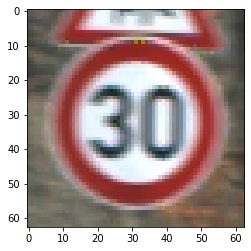

In [57]:
# Get paths to data.

datasetPath = Path("../datasets/gtsrb/GTSRB/Final_Training/Images/")

labelsPathList = sorted([labelPath for labelPath in datasetPath.iterdir() if labelPath.is_dir()])


# Get a list of all labels.

labelsList = [label.name for label in labelsPathList]


# Load all training data.

trainingImagesPathList = [ sorted([dataPath for dataPath in labelPath.iterdir() if dataPath.suffix == ".ppm"]) for labelPath in labelsPathList]

trainingImages = []
trainingImagesLabels = []

for trainingLabelsPath in trainingImagesPathList:
    for trainingImagePath in trainingLabelsPath:
        img = cv2.imread(str(trainingImagePath), cv2.IMREAD_UNCHANGED)
        trainingImages.append(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        trainingImagesLabels.append(int(trainingImagePath.parts[-2]))

        
plt.imshow(trainingImages[1000])
print(trainingImagesLabels[1000])

In [4]:
# Observe different aspects of the dataset.

numberOfImages = len(trainingImages)


# Check if the images are suqared (height = width)

squaredTrainingImages = []
notSquaredTrainingImages = []

for image in trainingImages:
    if image.shape[0] != image.shape[1]:
        notSquaredTrainingImages.append(image)
    else:
         squaredTrainingImages.append(image)

print(str(len(notSquaredTrainingImages)) + " out of " + str(len(trainingImages)) + " images are not squared!")

30847 out of 39209 images are not squared!


The average image is: 50.84 by 50.33 pixels.
The standard deviation is: 24.306623130197277 by 23.115127795106943 pixels.


Text(0.5, 0, 'height')

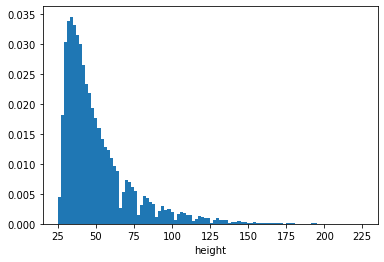

In [5]:
# Check what the dimensions of the average image are.

widthMean = 0
heightMean = 0
widths = []
heights = []

for image in trainingImages:
    heightMean += image.shape[0]
    heights.append(image.shape[0])
    widthMean += image.shape[1]
    widths.append(image.shape[1])
    
widthMean = widthMean / numberOfImages
heightMean = heightMean / numberOfImages

print("The average image is: " + str(round(widthMean, 2)) + " by " + str(round(heightMean, 2)) + " pixels.")
print("The standard deviation is: " + str(np.std(widths)) + " by " + str(np.std(heights)) + " pixels.")

plt.hist(heights, bins=100, label="heights", density=True)
plt.xlabel("height")


Text(0.5, 0, 'widths')

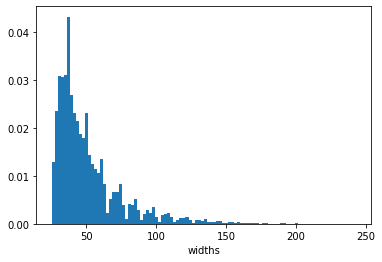

In [6]:
plt.hist(widths, bins=100, label="widths", density=True)
plt.xlabel("widths")

# We can see that images vary a lot in dimensions. Settling for an image size might be difficult.
# Should try cropping images in different ways like: scaling to 32x32, scaling to 50x50, scaling to 64x64,
# or finding the smallest possible ratio so that all traffic signs fit inside the bounding boxes.
# The bounding boxes can be found inside each label's directory inside GT*.txt

Text(0, 0.5, 'Number of images')

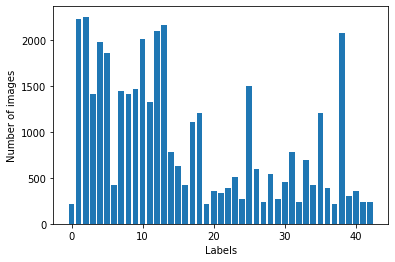

In [7]:
# Visualizing the difference in the number of images for each label.

numberOfImagesPerLabel = [len([image for image in label]) for label in trainingImagesPathList]

plt.bar(range(len(numberOfImagesPerLabel)), numberOfImagesPerLabel)
plt.xlabel("Labels")
plt.ylabel("Number of images")

# The training data is pretty skewed.

In [77]:
# Read 

labels = []

with open("../datasets/gtsrb/labels.txt", "r") as fp:
    lines = fp.readlines()
    for label in lines:
        labels.append(label.strip())
        
print(labels)
        
X_train = np.array(trainingImages)
y_train = np.array(trainingImagesLabels)

['SpeedLimit_20', 'SpeedLimit_30', 'SpeedLimit_50', 'SpeedLimit_60', 'SpeedLimit_70', 'SpeedLimit_80', 'EndRestriction_SpeedLimit_80', 'SpeedLimit_100', 'SpeedLimit_120', 'OvertakingProhibited', 'OvertakingProhibited_Trucks', 'Crossroad_SideRoads', 'BeginPriorityRoad', 'GiveWay', 'Stop', 'EntryProhibited', 'EntryProhibited_Trucks', 'EntryProhibited_OneWayTraffic', 'OtherDangers', 'CurveLeft', 'CurveRight', 'CurveSuccesion_FirstLeft', 'BumpyRoad', 'SlipperyRoad', 'RoadNarrowing_Right', 'RoadWorks', 'TrafficLight', 'Pedestrians', 'School', 'Bycicles', 'FrostWarning', 'DeerWarning', 'EndOfAllRestrictions', 'TurnRight', 'TurnLeft', 'Go_Straight', 'Go_Straight_Or_TurnRight', 'GoS_traight_Or_TurnLeft', 'Passing_right', 'Passing_left', 'Roundabout', 'OvertakingAllowed', 'OvertakingAllowed_Trucks']


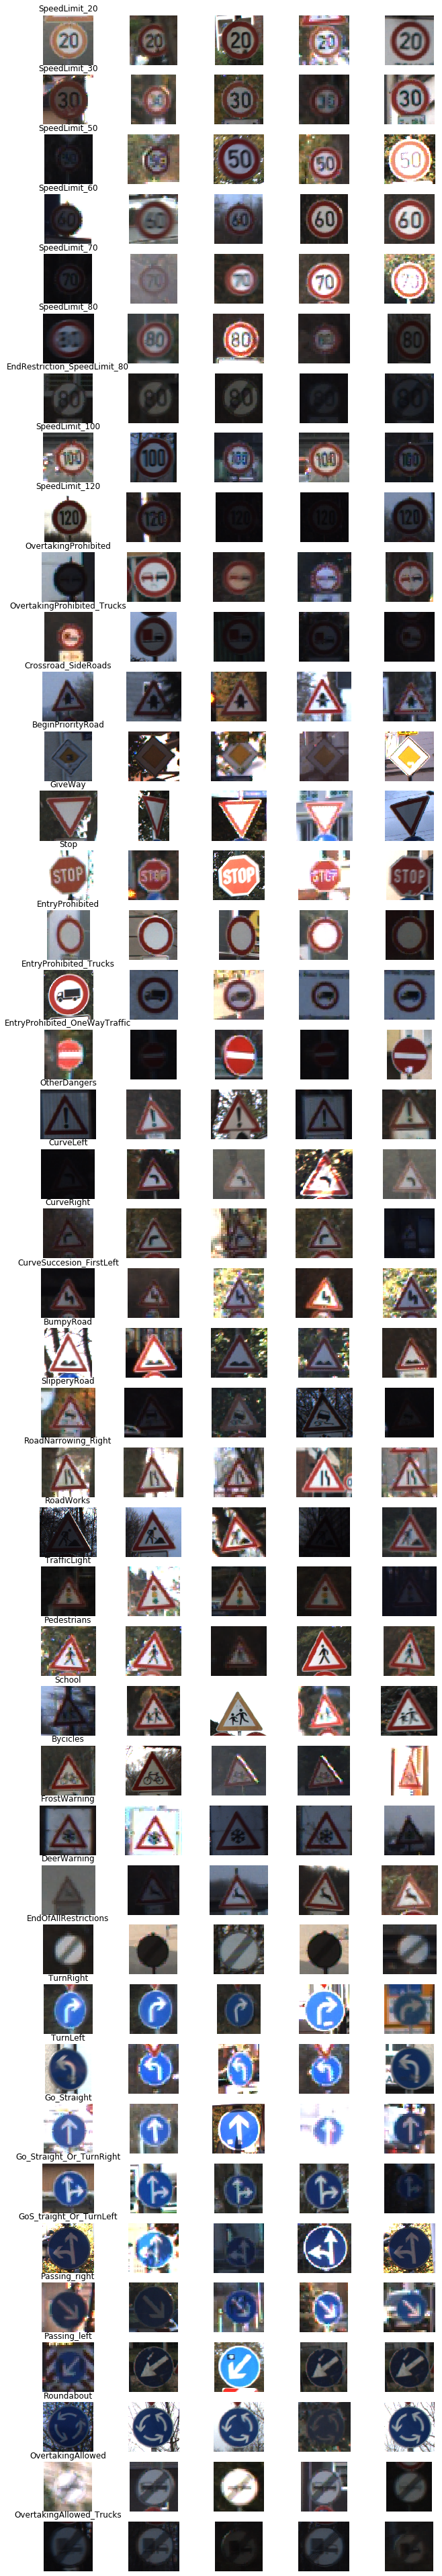

In [120]:
classes = np.array(labels)

num_classes = len(classes)
samples_per_class = 5

# Show 5 samples per class

%matplotlib inline
plt.rcParams['figure.figsize'] = (11, 70) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i + samples_per_class * y + 1 #* num_classes + y + 1
        plt.subplot(num_classes, samples_per_class, plt_idx)
        plt.imshow(X_train[idx])
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

In [114]:

#From the samples above we can observe the following statements about the images:
#        - the lighting of the images is not consistent. Some are very dark, some are very shiny, and some have variate lighting.
#        - some images are very blurry
#        - some images might contain a small portion of other classes,
#        - some images have the sign rotated in 3-Dimensional space,
#        - some images have different weather conditions (for example fog),
#        - some images contain small occlusion.


numpy.ndarray